In [ ]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [ ]:
M = 10000

x1 = np.random.rand(M, 1)
x2 = np.random.rand(M, 1)
w = 10.0*np.random.randn(M, 1)

y = 3.0*x1 + 1.5*x2 + w

X = np.c_[x1, x2]

In [ ]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0,0] + a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [148]:
# Generate values for parameters.
N = 200
a0 = np.linspace(-10.0, 14.0, N)
a1 = np.linspace(-10.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2]*x1 + A1[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat) )

In [149]:
# Batch gradient descent solution.
alpha = 0.7  # learning rate
n_iterations = 10

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -5;
a[1] = -5;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(M+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
for iteration in range(n_iterations):
    gradients = -2/M * X.T.dot(y - X.dot(a))
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))

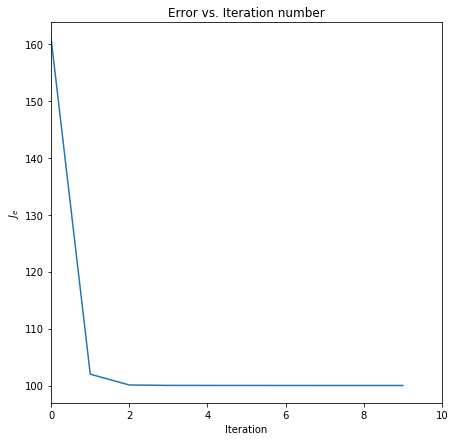

In [150]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, iteration+1), Jgd[0:iteration+1])
plt.xlim((0, iteration+1))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

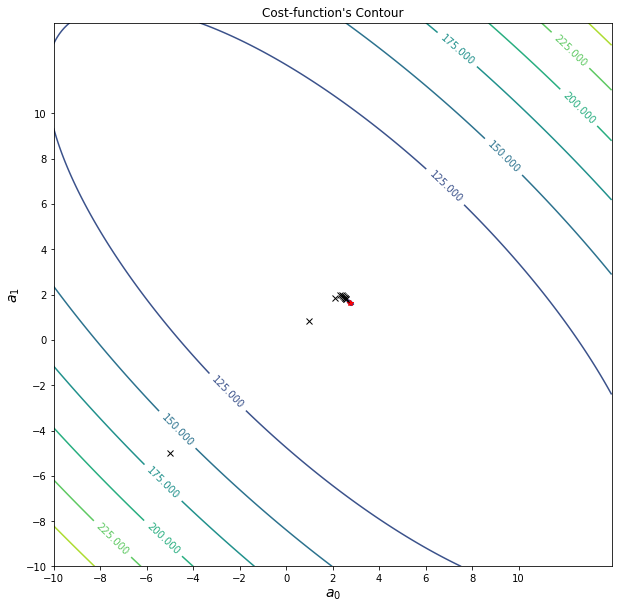

<Figure size 432x288 with 0 Axes>

In [151]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)